In [7]:
from google.colab import files
u=files.upload()

Saving archive.zip to archive.zip


We cannot load this csv file directly using only pandas library due to 'UnicodeDecodeError',hence,it is suggested using character encoding detection libraries like `chardet` or `cchardet` to automatically identify the character encoding of a file. These libraries analyze the file's byte sequences to make an informed guess about the encoding, which can be especially helpful when dealing with files of unknown or variable encodings. This approach allows you to dynamically select the correct encoding for reading the file, reducing the likelihood of encountering `UnicodeDecodeError`.

In [142]:
import pandas as pd
import chardet

with open("spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

encoding = result['encoding']

df = pd.read_csv("spam.csv", encoding=encoding)
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [143]:
df.shape

(5572, 5)

**1.Data Cleaning**

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [145]:
df=df.drop(df.iloc[:,[2,3,4]],axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [146]:
df.rename(columns={"v1":"Target","v2":"Text"},inplace=True)
df

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [147]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [148]:
df['Target'] = encoder.fit_transform(df['Target'])

In [149]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


0 --> ham

1 --> spam

In [150]:
# missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [151]:
# check for duplicate values
df.duplicated().sum()

403

In [152]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [153]:
df.duplicated().sum()

0

**2.Exploratory Data Analysis**

In [154]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [155]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

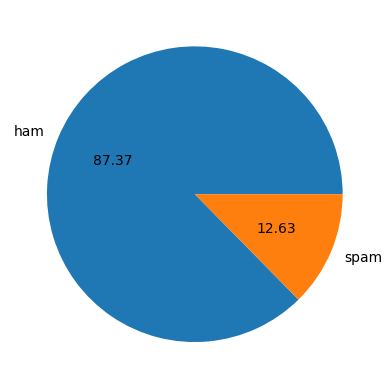

In [156]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

As there is huge imabalance in our data we need to balance it out through more analysis

In [157]:
import nltk
!pip install nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [158]:
df['num_characters'] = df['Text'].apply(len)

<ipython-input-158-c2765f95e181>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['Text'].apply(len)


In [159]:
df

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [160]:
# num of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-160-a5a9939cef5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [161]:
df

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [162]:
#Number of sentences
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

<ipython-input-162-f1e5f5c72f6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [163]:
df.describe()

,Target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [164]:
#For ham
df[df["Target"]==0].describe()

,Target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [165]:
#For spam
df[df["Target"]==1].describe()

,Target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

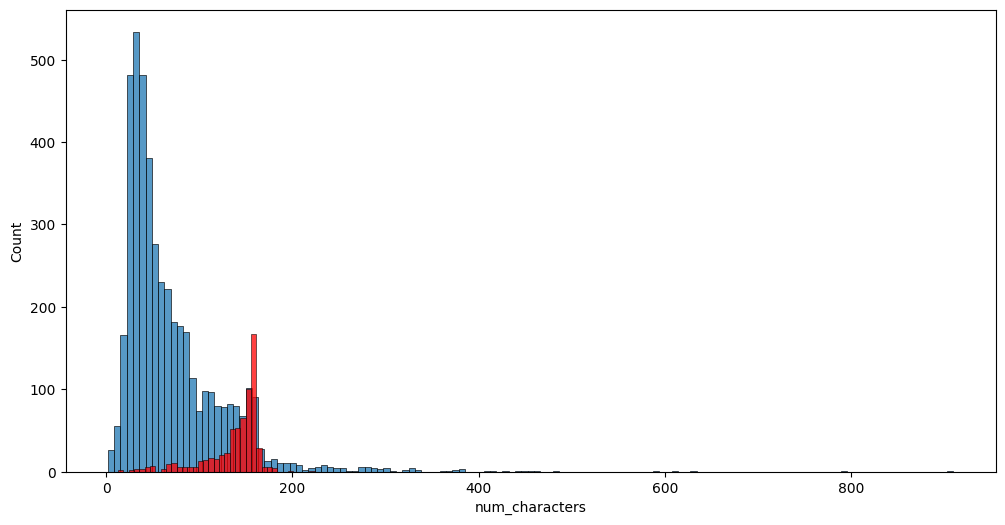

In [166]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_characters'])
sns.histplot(df[df['Target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

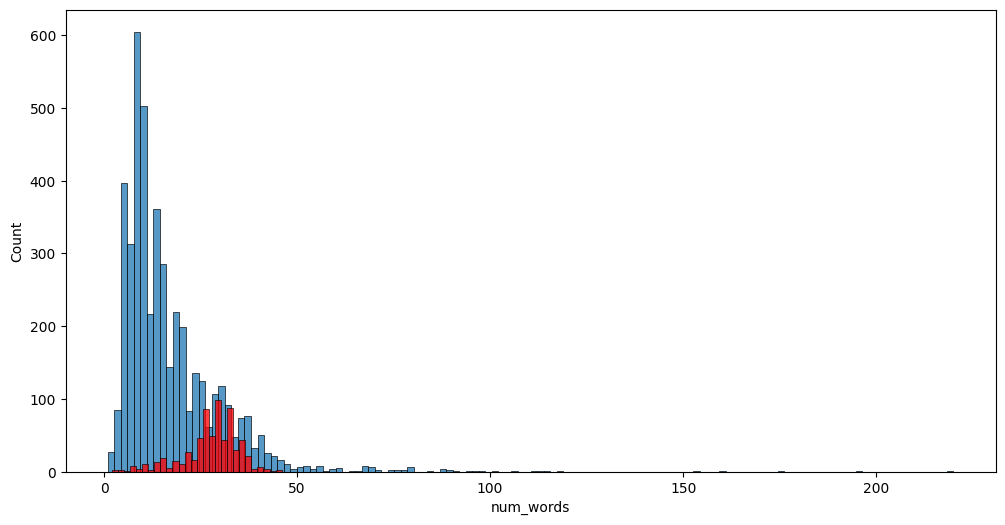

In [167]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target'] == 0]['num_words'])
sns.histplot(df[df['Target'] == 1]['num_words'],color='red')

<ipython-input-168-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

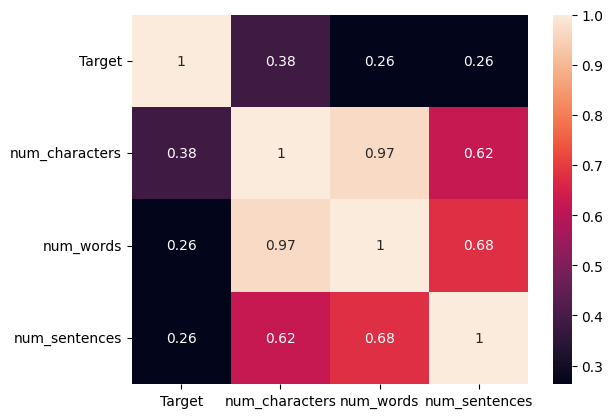

In [168]:
sns.heatmap(df.corr(),annot=True)

**3. Data Preprocessing**

In [169]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [170]:
#To remove stopwords
from nltk.corpus import stopwords

#To remove punctuation marks
import string


In [171]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [172]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [175]:
transform_text("Hello i am Aryan")

'hello aryan'

In [176]:
df['transformed_text'] = df['Text'].apply(transform_text)

<ipython-input-176-88bf366627f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['Text'].apply(transform_text)


In [177]:
df

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


**We will create WordCloud to identify which words are important in spam and ham**

In [178]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [179]:
spam_wc = wc.generate(df[df['Target'] == 1]['transformed_text'].str.cat(sep=" "))

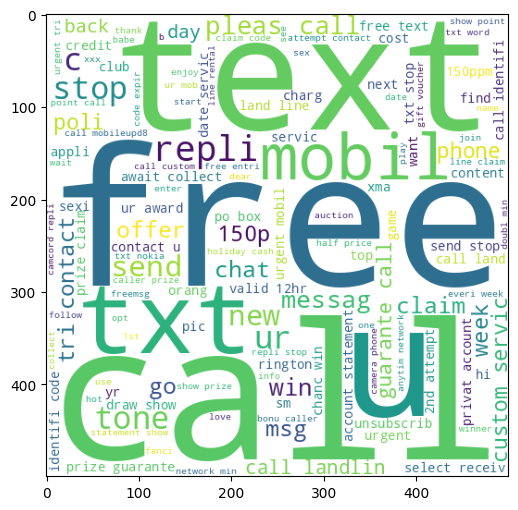

In [180]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [181]:
ham_wc = wc.generate(df[df['Target'] == 0]['transformed_text'].str.cat(sep=" "))

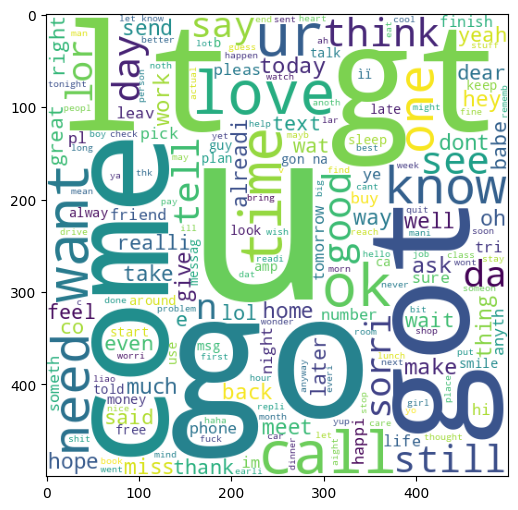

In [182]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [183]:
spam_corpus = []
for msg in df[df['Target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [184]:
len(spam_corpus)

9939

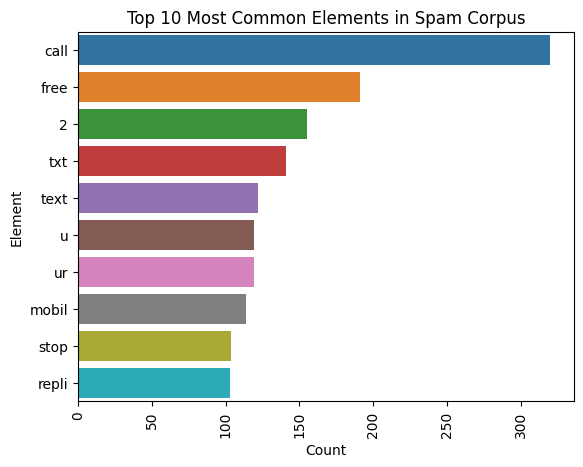

In [185]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

common_elements = Counter(spam_corpus).most_common(10)

# Creating a DataFrame from the common elements
df_common = pd.DataFrame(common_elements, columns=['Element', 'Count'])

# Using sns.barplot to create the bar plot
sns.barplot(x='Count', y='Element', data=df_common)

plt.xticks(rotation='vertical')
plt.xlabel('Count')
plt.ylabel('Element')
plt.title('Top 10 Most Common Elements in Spam Corpus')

plt.show()


In [186]:
ham_corpus = []
for msg in df[df['Target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [187]:
len(ham_corpus)

35404

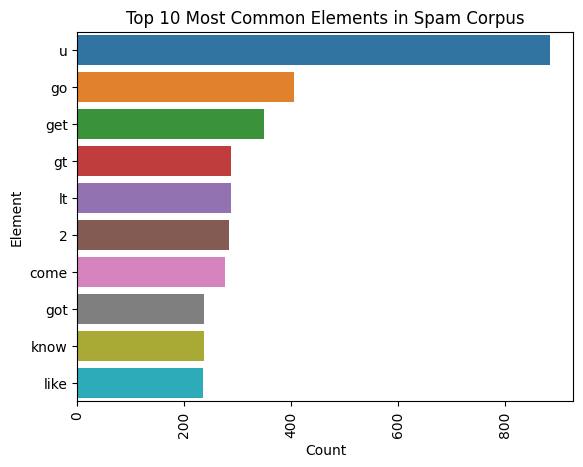

In [188]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

common_elements = Counter(ham_corpus).most_common(10)

# Creating a DataFrame from the common elements
df_common = pd.DataFrame(common_elements, columns=['Element', 'Count'])

# Using sns.barplot to create the bar plot
sns.barplot(x='Count', y='Element', data=df_common)

plt.xticks(rotation='vertical')
plt.xlabel('Count')
plt.ylabel('Element')
plt.title('Top 10 Most Common Elements in Spam Corpus')

plt.show()


**4. Model Building**

In [189]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [190]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [191]:
X.shape

(5169, 3000)

In [192]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [193]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

**Using Naive_bayes Classification which is considered to be optimal for Text classification**

In [194]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

If Data is imbalance then **Precision Score** matters more than Accuracy Score

In [195]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score using GaussianNB :",accuracy_score(y_test,y_pred1))
print("Precision Score using GaussianNB :",precision_score(y_test,y_pred1))

Accuracy Score using GaussianNB : 0.8694390715667312
Precision Score using GaussianNB : 0.5068493150684932


In [196]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score using MultinomialNB :",accuracy_score(y_test,y_pred2))
print("Precision Score using MultinomialNB :",precision_score(y_test,y_pred2))

Accuracy Score using MultinomialNB : 0.9709864603481625
Precision Score using MultinomialNB : 1.0


In [197]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score using BernoulliNB :",accuracy_score(y_test,y_pred3))
print("Precision Score using BernoulliNB :",precision_score(y_test,y_pred3))

Accuracy Score using BernoulliNB : 0.9835589941972921
Precision Score using BernoulliNB : 0.991869918699187


**In above we can conclude that MultinomialNB gives best Precision Score**

**Trying 2 more Classification for Accuracy and Precision Score**

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

In [199]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()

In [200]:
clfs = {
    'SVC' : svc,
    'NB': mnb,
    'LR': lrc
}

In [201]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision


In [202]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [203]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703


In [204]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values
performance_df

<bound method DataFrame.sort_values of   Algorithm  Accuracy  Precision
0       SVC  0.975822   0.974790
1        NB  0.970986   1.000000
2        LR  0.958414   0.970297>

**Among SVC and Logistic Regression, Naive_Bayes has the best Accuracy and Precision Score**

**5.Testing Our Model**

In [206]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


while True:
    input_sms = input("Enter the message (or type 'exit' to quit): ")

    if input_sms.lower() == 'exit':
        break

    # 1. Preprocess
    transformed_sms = transform_text(input_sms)
    # 2. Vectorize
    vector_input = tfidf.transform([transformed_sms])
    # 3. Predict
    result = mnb.predict(vector_input)[0]

    if result == 1:
        print("Spam")
    else:
        print("Not Spam")


Enter the message (or type 'exit' to quit): XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
Spam
Enter the message (or type 'exit' to quit): Oh k...i'm watching here:)
Not Spam
Enter the message (or type 'exit' to quit): quit
Not Spam
Enter the message (or type 'exit' to quit): exit
